In [1]:
import torch
from torchvision import datasets, transforms


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [11]:
from torch import nn, optim
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

In [12]:
model = Classifier()

images, labels = next(iter(testloader))
ps = torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [14]:
top_p, top_class = ps.topk(1,dim=1) #topk를 사용한다 예측에서는 가장 비슷한거를 고르려면 ps.topk(1)
print(top_class[:10,:])

tensor([[2],
        [5],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [5],
        [2]])


In [16]:
equals = top_class == labels.view(*top_class.shape)
torch.mean(equals)

RuntimeError: Can only calculate the mean of floating types. Got Bool instead.

In [19]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 6.25%


In [21]:
model = Classifier()

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0
train_losses, test_losses = [], []
for e  in range(epochs):
    running_loss = 0
    for images, labels, in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%
Accuracy: 6.25%


In [22]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

      
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [25]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
                            "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.603..  Test Loss: 0.491..  Test Accuracy: 0.822
Epoch: 2/30..  Training Loss: 0.478..  Test Loss: 0.439..  Test Accuracy: 0.842
Epoch: 3/30..  Training Loss: 0.449..  Test Loss: 0.419..  Test Accuracy: 0.848
Epoch: 4/30..  Training Loss: 0.428..  Test Loss: 0.408..  Test Accuracy: 0.854
Epoch: 5/30..  Training Loss: 0.417..  Test Loss: 0.421..  Test Accuracy: 0.845
Epoch: 6/30..  Training Loss: 0.408..  Test Loss: 0.408..  Test Accuracy: 0.853
Epoch: 7/30..  Training Loss: 0.402..  Test Loss: 0.417..  Test Accuracy: 0.848
Epoch: 8/30..  Training Loss: 0.395..  Test Loss: 0.380..  Test Accuracy: 0.863
Epoch: 9/30..  Training Loss: 0.393..  Test Loss: 0.381..  Test Accuracy: 0.863
Epoch: 10/30..  Training Loss: 0.388..  Test Loss: 0.380..  Test Accuracy: 0.867
Epoch: 11/30..  Training Loss: 0.381..  Test Loss: 0.370..  Test Accuracy: 0.870
Epoch: 12/30..  Training Loss: 0.378..  Test Loss: 0.369..  Test Accuracy: 0.868
Epoch: 13/30..  Training Loss: 0.378.

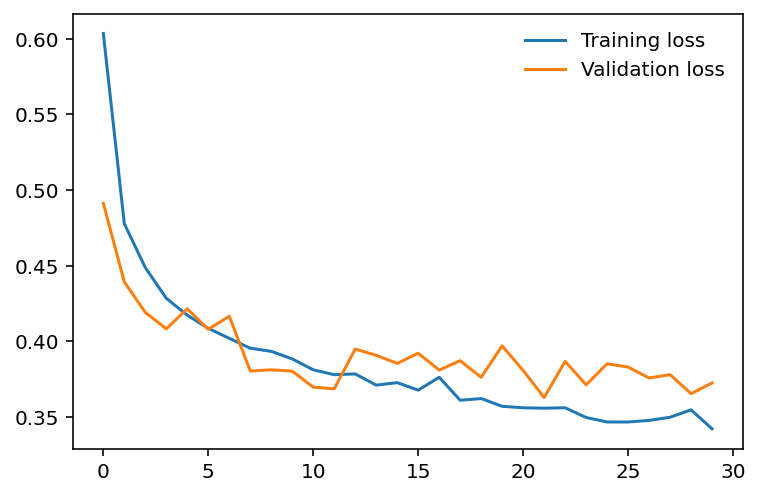

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

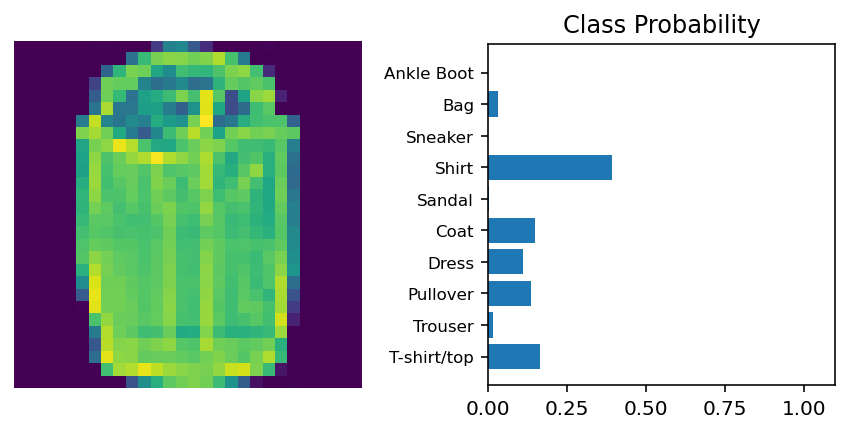

In [27]:

import helper
model.eval()
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.view(1, 784)
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')